In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\13472\Documents\05-2023 Instacart Basket Analysis- UE'

In [3]:
# Importing dataframe

ords_prods_agg = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_agg.pkl'))

In [4]:
ords_prods_agg.shape

(32404859, 25)

# Creating Bar Charts

<Axes: >

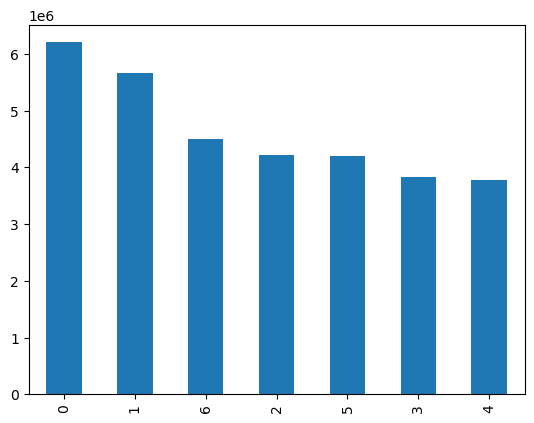

In [5]:
ords_prods_agg['orders_day_of_week'].value_counts().plot.bar()

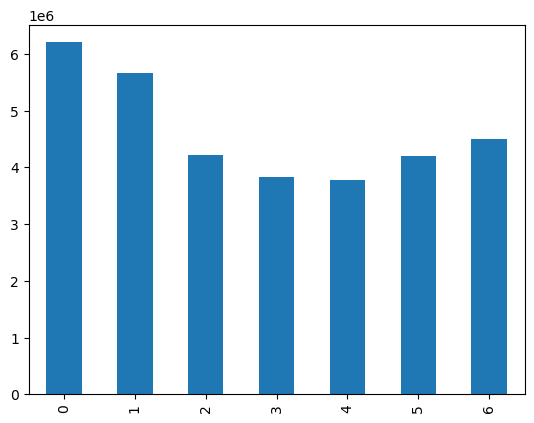

In [6]:
# Sorting by index
bar = ords_prods_agg['orders_day_of_week'].value_counts().sort_index().plot.bar()

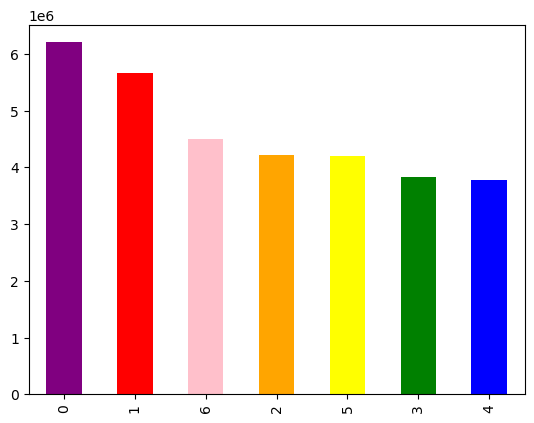

In [7]:
# Adding color to bar chart
bar = ords_prods_agg['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [8]:
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms and Scatterplots

<Axes: ylabel='Frequency'>

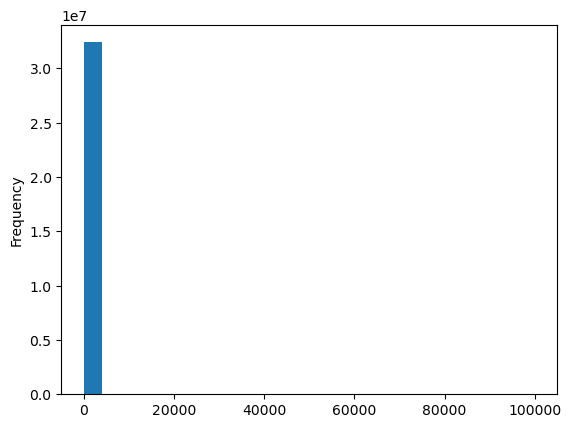

In [9]:
# Creating a histogram of the prices column
ords_prods_agg['prices'].plot.hist(bins = 25)

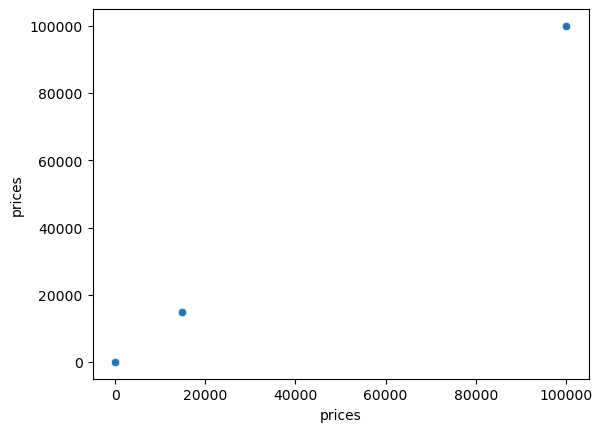

In [10]:
# Creating a scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_agg)

In [11]:
ords_prods_agg.loc[ords_prods_agg['prices'] > 100]

,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,orders_hod,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag
10030345,171,912404,17,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,181,603376,17,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,1944,3264360,135,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,1945,892534,135,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,5708,229704,342,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,3386544,2363282,204099,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3391313,3181945,204395,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least busy,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,3405096,2486215,205227,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [12]:
# Marking them with Nan
ords_prods_agg.loc[ords_prods_agg['prices'] >100, 'prices'] = np.nan

In [13]:
ords_prods_agg['prices'].max()

25.0

# Revisiting histogram

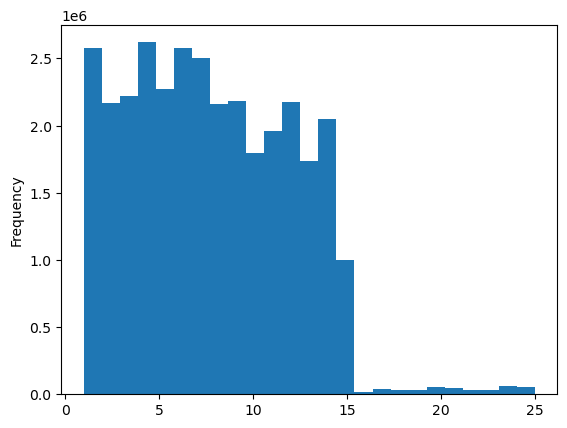

In [14]:
hist = ords_prods_agg['prices'].plot.hist(bins = 25)

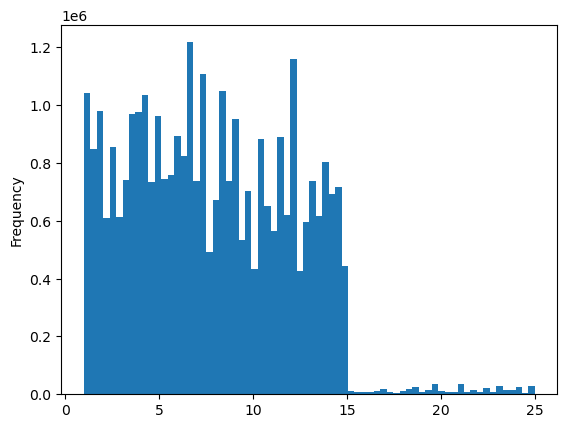

In [15]:
# Increasing level of granularity to 70
hist_2 = ords_prods_agg['prices'].plot.hist(bins = 70)

In [16]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'hist_prices.png'))

In [17]:
# Exporting Histogram 2 
hist_2.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'hist_prices_2.png'))

# Sampling data

In [19]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_agg)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
# Store 70% of the sample in the dataframe big
big = ords_prods_agg[dev]

In [23]:
# Store 30% of the sample in the dataframe small
small = ords_prods_agg[~dev]

In [24]:
len(ords_prods_agg)

32404859

In [25]:
len(big)+len(small)

32404859

In [26]:
# Reducing sample
df_2 = small[['orders_day_of_week','prices']]

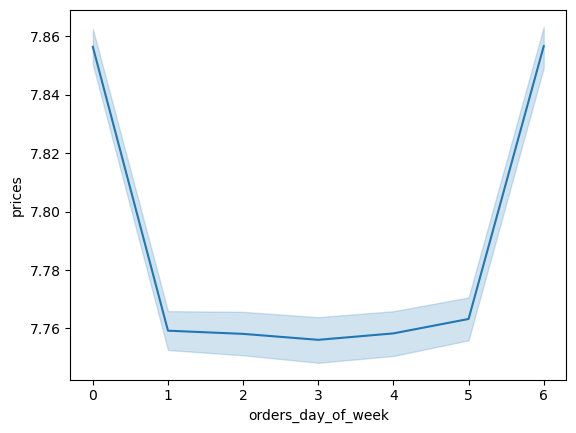

In [27]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [28]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'prices_by_dow_line.png'))